# Notebook 01 — Data Understanding (Fraud Detection)

Goal:
- Check dataset quality
- Quantify extreme class imbalance
- Demonstrate why **accuracy is misleading** for fraud detection

In [5]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.config import CFG
from src.io import load_csv

plt.rcParams["figure.figsize"] = (7, 4)

In [6]:
DATA_PATH = "../data/raw/creditcard.csv"

df = load_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isna().sum().sort_values(ascending=False).head(10)

Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64

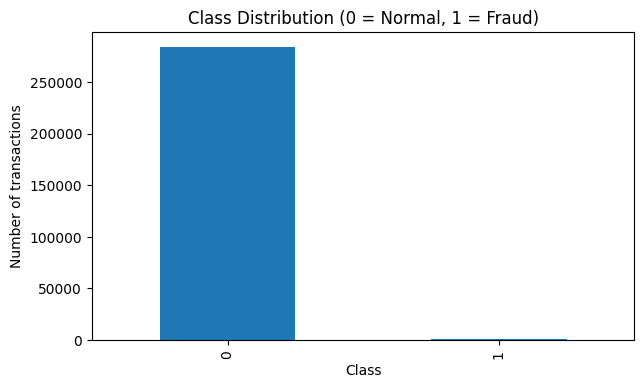

In [9]:
target_col = CFG.target_col

counts = df[target_col].value_counts()
ratio = counts / len(df)

counts, ratio

counts.plot(kind="bar")
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.ylabel("Number of transactions")
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

y_true = df[target_col].values
y_pred_dummy = np.zeros_like(y_true)

accuracy_score(y_true, y_pred_dummy)

0.9982725143693799

## Accuracy Trap

A naive model that predicts **every transaction as non-fraud** achieves very high accuracy,
while detecting **zero** fraudulent transactions.

This is why we focus on:
- Precision / Recall / F1
- PR-AUC (Average Precision)
- Threshold tuning based on business constraints

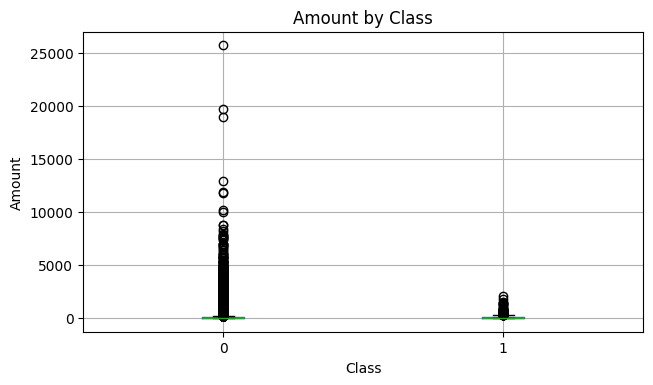

In [11]:
df.groupby(target_col)["Amount"].describe()

df.boxplot(column="Amount", by=target_col)
plt.title("Amount by Class")
plt.suptitle("")
plt.ylabel("Amount")
plt.show()

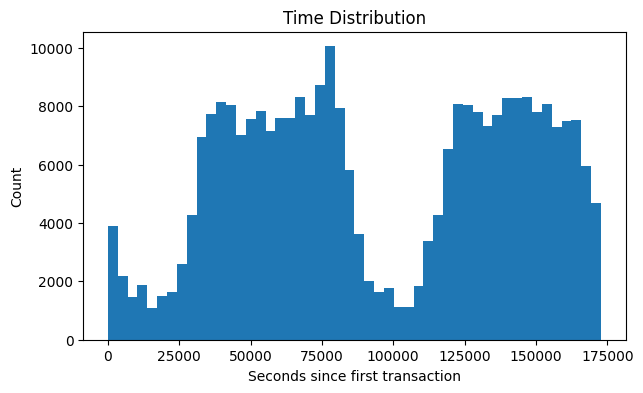

In [12]:
plt.hist(df["Time"], bins=50)
plt.title("Time Distribution")
plt.xlabel("Seconds since first transaction")
plt.ylabel("Count")
plt.show()